# Clustering
In this series, we intend to provide implementations of the methods and algorithms described by [Rokach and Maimon 2005, ch 15](http://www.springer.com/us/book/9780387254654). Although these routines can be found on available packages like SciPy, the routines below are for educational purposes.

## Clustering Methods
In this notebook we cover the topic of effectively grouping the data into clusters.

### Hierarchical methods
Agglomerative hierarchical clustering — Each object initially represents a cluster of its own. Then clusters are successively merged until the desired cluster structure is obtained.

In [1]:
import numpy as np
import scipy.spatial.distance as spd
from sklearn import datasets
import scipy.cluster.hierarchy as hier
import matplotlib.pyplot as plt
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

We calculate the distance between clusters

In [2]:
def cDistance(data,c1,c2,distance=spd.euclidean,method="min"):
    import scipy.spatial.distance as spd
    if method == "max":
        dist = np.zeros([len(c1),len(c2)])
        for idi in range(len(c1)):
            for idj in range(len(c2)):
                dist[idi,idj] = distance(data[c1[idi]],data[c2[idj]])
        res = np.max(dist)        
    elif method == "mean":
        c1 = np.mean(data[c1],axis=0)
        c2 = np.mean(data[c2],axis=0)
        res = distance(c1,c2)
    else:
        dist = np.zeros([len(c1),len(c2)])
        for idi in range(len(c1)):
            for idj in range(len(c2)):
                dist[idi,idj] = distance(data[c1[idi]],data[c2[idj]])
        res = np.min(dist)
    return res

Then we calculate the clustering

In [3]:
def hClustering(data,distance=spd.euclidean,method="min"):
    import scipy.spatial.distance as spd
    n = len(data) # I dont usually do this, but will try this it this time
    lm = np.zeros([(n-1),4]) # Linkage Matrix
    c = list(range(n)) # CLusters
    c = [[c[i]] for i in c] # COnvert all entries into lists
    cid = list(range(n)) #Cluster ID
    for idi in range(n-1): # Iterate over all clusters
        dist = float("inf")*np.ones([n-idi,n-idi])
        for idj in range(len(c)-1): # Find the clocest pair
            for idk in range(idj+1,len(c)):
                dist[idj,idk] = cDistance(data,c[idj],c[idk],distance=distance,method=method)
        [idj,idk] = np.unravel_index(dist.argmin(),dist.shape)
        if cid[idj] > cid[idk]: # Forces merging into the most recent (highest level) cluster
            temp = idj
            idj = idk
            idk = temp
        #Fills Linkage Matrix
        lm[idi,0] = cid[idj]
        lm[idi,1] = cid[idk]
        lm[idi,2] = dist.min()
        lm[idi,3] = len(c[idj])+len(c[idk])
        c[idj].extend(c[idk])
        del c[idk]
        cid[idj] = (n+idi)
        del cid[idk]
    return lm

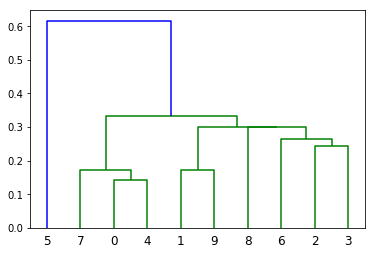

In [4]:
z = hClustering(iris.data[0:10])
hier.dendrogram(z)
plt.show()

As you can see, this algorithm works, but is too slow (try using the whole iris dataset). Therefore, the same task may be accomplished by ```scipy.cluster.hierarchy``` in a much faster manner.

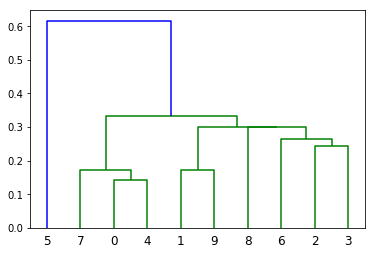

In [5]:
import scipy.cluster.hierarchy as hier
z = hier.linkage(iris.data[0:10])
hier.dendrogram(z)
plt.show()

### K-means
K means is a simple and intuitive method consisting of two steps. Initialize with the position central position of the clusters.

* 1) Assign each observation to the nearest cluster
* 2) Update the cluster center

For simplicity, we will use predefined number of steps as the convergence criterion. 

In [102]:
def kMeans (data,n,niter = 100):
    data = np.array(data)
    label = len(data)*[0]
    means = np.zeros([n,len(data[0])])
    for idi in range(n):
        means[idi] = data[np.random.randint(0,(len(data)))]
    for idi in range(niter):
        for idj in range(len(data)):
            dist_old = float('Inf')
            for idk in range(n):
                dist_new = spd.euclidean(data[idj],means[idk])
                if (dist_new < dist_old):
                    label[idj] = idk
                    dist_old = dist_new
        for idk in range(n):
            temp = data[np.array(label)==idk]
            if len(temp) > 0: means[idk] = np.mean(temp,axis=0)
    return label

In [104]:
temp = kMeans(iris.data,3)
print(temp.count(0),temp.count(1),temp.count(2))

62 38 50


### Honorable mentions
This work by noo means intend to be exhaustive in clustering methods. Therefore we mention some worthy methods to be tested later on.
* K-medoids
* DBSCAN and AUTOCLASS
* SOM (Some say it's deprecated, others say it is very good for high dimensional data visualization)
* 
